In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_california_housing


In [2]:
housing = fetch_california_housing()
print(housing)

NameError: name 'fetch_california_housing' is not defined

In [ ]:
dataset=pd.DataFrame(housing.data)

In [ ]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [1]:
dataset.columns = housing.feature_names

NameError: name 'housing' is not defined

In [ ]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
## Independet  features and dependent features 
x=dataset
y = housing.target

In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

## Train test split


In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42)


In [ ]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


## Standardizing the Dataset

In [ ]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [ ]:
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

## Cross validation

from sklearn.model_selection import cross_val_score

In [ ]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
mse = cross_val_score(regression,x_train,y_train,scoring ='neg_mean_squared_error', cv=20)

In [ ]:
np.mean(mse)

-0.5256310821763294

In [ ]:
## Prediction
reg_pred = regression.predict(x_test)

C:\Users\soumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
reg_pred

array([-37.84741618, -37.11081487, -36.70791505, ..., -37.08104512,
       -37.25035096, -37.28768464])

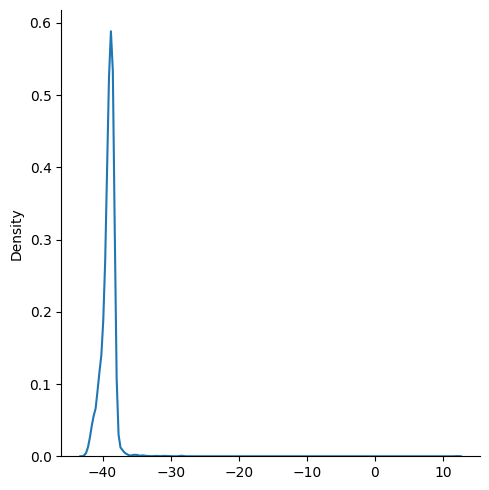

In [ ]:
import seaborn as sns
sns.displot(reg_pred-y_test, kind='kde')